In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


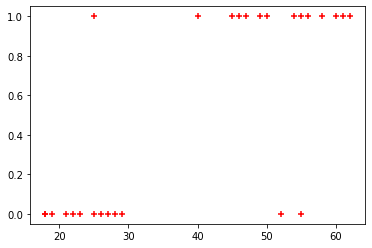

In [3]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [28]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
                       age  bought_insurance
age               1.000000          0.732395
bought_insurance  0.732395          1.000000


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')


In [19]:
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
X_test

,age
14,49
11,28
4,46
12,27
5,56
25,54


In [21]:
y_predicted = model.predict(X_test)

In [22]:
model.predict_proba(X_test)

array([[0.26521042, 0.73478958],
       [0.79363014, 0.20636986],
       [0.33602488, 0.66397512],
       [0.81147372, 0.18852628],
       [0.1409127 , 0.8590873 ],
       [0.17045643, 0.82954357]])

In [23]:
model.score(X_test,y_test)

1.0

In [24]:
y_predicted

array([1, 0, 1, 0, 1, 1], dtype=int64)

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Confusion matrix
cm = confusion_matrix(y_test, y_predicted)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test, y_predicted)
print("\nClassification Report:")
print(cr)


Confusion Matrix:
[[2 0]
 [0 4]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



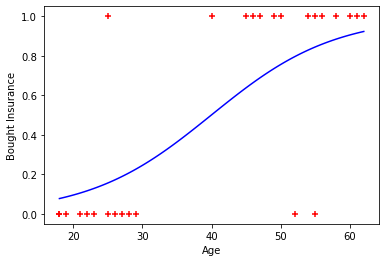

In [26]:
import numpy as np

# Generate evenly spaced values between the minimum and maximum ages
age_values = np.linspace(df.age.min(), df.age.max(), 100)

# Get the predicted probabilities for each age value
probabilities = model.predict_proba(age_values.reshape(-1,1))[:, 1]

# Plot the data points and decision boundary
plt.scatter(df.age, df.bought_insurance, marker='+', color='red')
plt.plot(age_values, probabilities, color='blue')
plt.xlabel('Age')
plt.ylabel('Bought Insurance')
plt.show()
